# Modelleren - analyse opdracht

## Simulatie uitbreiding 2

In [1]:
# prepare environment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function that calculates dm1/dt, dc1/dt, dm2/dt, dc2/dt
def ddt(t, m1, m2, m1_0, m2_0, c1, c2, r0, 
        kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6):
    K1 = kleinek2/(kleinek1 * m1_0)
    K2 = kleinek5/(kleinek1 * r0)
    K3 = m1_0/r0
    K4 = (kleinek3 * m2_0)/(kleinek1 * r0)
    K5 = kleinek4/(kleinek1 * r0)
    K6 = kleinek3/kleinek1
    K7 = kleinek6/(kleinek1 * r0)
    
    dm1dt = -m1*(1 - c1 - c2) + K1*c1 - K2*m1
    dc1dt = K3*m1*(1 - c1 - c2) - K1*K3*c1 - K4*m2*c1 + K5*c2
    dm2dt = -K6*m2*c1 + (K6*K5/K4)*c2 - K7*m2
    dc2dt = K4*m2*c1 - K5*c2
    return [dm1dt, dc1dt, dm2dt, dc2dt]

# test function 
ddt(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

[1.0, -2.0, -1.0, 0.0]

In [3]:
# function for RK4 
def RK4_M(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
          kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6):
    # step size 
    h = (tn - t0)/n
    
    # create vectors to save iterations 
    t = np.zeros(n+1) 
    t[0] = t0
    
    m1 = np.zeros(n+1)
    m1[0] = m1_0
    
    m2 = np.zeros(n+1)
    m2[0] = m2_0
    
    c1 = np.zeros(n+1) 
    c1[0] = c1_0
    
    c2 = np.zeros(n+1) 
    c2[0] = c2_0
    
    # perform RK4
    for i in range(n):
        k1_m1, k1_c1, k1_m2, k1_c2 = np.multiply(ddt(t[i], m1[i], m2[i], m1_0, m2_0, c1[i], c2[i], r0, kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6), h) 
        k2_m1, k2_c1, k2_m2, k2_c2 = np.multiply(ddt(t[i]+h/2, m1[i]+k1_m1/2, m2[i]+k1_m2/2, m1_0, m2_0, c1[i]+k1_c1/2, c2[i]+k1_c2/2, r0, kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6), h) 
        k3_m1, k3_c1, k3_m2, k3_c2 = np.multiply(ddt(t[i]+h/2, m1[i]+k2_m1/2, m2[i]+k2_m2/2, m1_0, m2_0, c1[i]+k2_c1/2, c2[i]+k2_c2/2, r0, kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6), h) 
        k4_m1, k4_c1, k4_m2, k4_c2 = np.multiply(ddt(t[i]+h, m1[i]+k3_m1, m2[i]+k3_m2, m1_0, m2_0, c1[i]+k3_c1, c2[i]+k3_c2, r0, kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6), h) 

        k_m1 = (k1_m1 + 2*k2_m1 + 2*k3_m1 + k4_m1)/6
        k_c1 = (k1_c1 + 2*k2_c1 + 2*k3_c1 + k4_c1)/6
        k_m2 = (k1_m2 + 2*k2_m2 + 2*k3_m2 + k4_m2)/6
        k_c2 = (k1_c2 + 2*k2_c2 + 2*k3_c2 + k4_c2)/6
        
        # set and save values 
        t[i+1] = t[i] + h
        m1[i+1] = m1[i] + k_m1
        c1[i+1] = c1[i] + k_c1
        m2[i+1] = m2[i] + k_m2
        c2[i+1] = c2[i] + k_c2
        
    # translate values back to dimension-full variables
    t = t / (kleinek1*r0)
    m1 = m1 * m1_0
    c1 = c1 * r0
    m2 = m2 * m2_0
    c2 = c2 * r0
        
    return(t, m1, c1, m2, c2)

In [4]:
# set starting values 
t0 = 0
tn = 2
n = 10
m1_0 = 1
m2_0 = 1
c1_0 = 0
c2_0 = 0
r0 = 1
kleinek1 = 1
kleinek2 = 1 
kleinek3 = 1 
kleinek4 = 1
kleinek5 = 1 
kleinek6 = 1 

# try function 
RK4_M(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
      kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([1.        , 0.69429581, 0.50860394, 0.38808929, 0.30643028,
        0.24934272, 0.20839308, 0.17830898, 0.1556667 , 0.13818758,
        0.12433126]),
 array([0.        , 0.12705082, 0.17583875, 0.19359055, 0.19791776,
        0.19599579, 0.19098395, 0.18437928, 0.1769448 , 0.16909868,
        0.16108638]),
 array([1.        , 0.80734629, 0.64459706, 0.51519686, 0.41427392,
        0.33582576, 0.2746214 , 0.22652735, 0.18839661, 0.15786859,
        0.1331812 ]),
 array([0.        , 0.0121854 , 0.03029072, 0.0442328 , 0.05263381,
        0.05640206, 0.05681347, 0.05498387, 0.05176775, 0.04778062,
        0.0434489 ]))

In [5]:
# function that creates graphs 
def sim_plot_full(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
                  kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6,
                  m1axis, m2axis, c1axis, c2axis, counter, title, style):
    
    time, med1, com1, med2, com2 = RK4_M(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
                                         kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6)
    
    plt.figure(counter)
    plt.subplot(2, 2, 1)
    plt.plot(time, med1, linestyle = style) # plotting medication 
    plt.title(title)
    plt.ylabel('Medication 1 (mol/L)')
    plt.xticks(color='w')
    plt.xlim(0, max(time))
    plt.ylim(0, m1axis)
    
    plt.subplot(2, 2, 3)
    plt.plot(time, com1, linestyle = style) # plotting complex
    plt.xlabel('Time (s)')
    plt.ylabel('Complex 1 (mol/L)')
    plt.xlim(0, max(time))
    plt.ylim(0, c1axis)
    
    plt.subplot(2, 2, 2)
    plt.plot(time, med2, linestyle = style) # plotting medication 
    plt.title(title)
    plt.ylabel('Medication 2 (mol/L)')
    plt.xticks(color ='w')
    plt.xlim(0, max(time))
    plt.ylim(0, m2axis)
    
    plt.subplot(2, 2, 4)
    plt.plot(time, com2, linestyle = style) # plotting complex
    plt.xlabel('Time (s)')
    plt.ylabel('Complex 2 (mol/L)')
    plt.xlim(0, max(time))
    plt.ylim(0, c2axis)
    
    plt.subplots_adjust(wspace=0.5)

Trying the function:

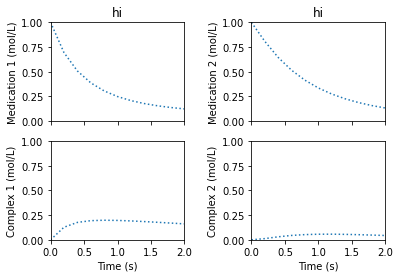

In [6]:
# set starting values 
t0 = 0
tn = 2
n = 10
m1_0 = 1
m2_0 = 1
c1_0 = 0
c2_0 = 0
r0 = 1
kleinek1 = 1
kleinek2 = 1 
kleinek3 = 1 
kleinek4 = 1
kleinek5 = 1 
kleinek6 = 1 

# try function
sim_plot_full(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
              kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6,
              1, 1, 1, 1, 1, "hi", 'dotted')

In [7]:
# function that creates only the graphs for the complexes
def sim_plot_compl(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
                   kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6,
                   c1axis, c2axis, counter, title, style):
    
    time, med1, com1, med2, com2 = RK4_M(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
                                         kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6)
    
    plt.figure(counter)
    
    plt.subplot(2, 1, 1)
    plt.plot(time, com1, linestyle = style) # plotting complex
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Complex 1 (mol/L)')
    plt.xticks(color='w')
    plt.xlim(0, max(time))
    plt.ylim(0, c1axis)
    
    plt.subplot(2, 1, 2)
    plt.plot(time, com2, linestyle = style) # plotting complex
    plt.xlabel('Time (s)')
    plt.ylabel('Complex 2 (mol/L)')
    plt.xlim(0, max(time))
    plt.ylim(0, c2axis)

Trying the function:

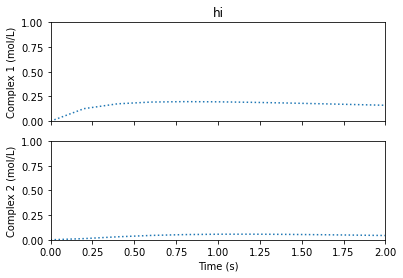

In [8]:
# set starting values 
t0 = 0
tn = 2
n = 10
m1_0 = 1
m2_0 = 1
c1_0 = 0
c2_0 = 0
r0 = 1
kleinek1 = 1
kleinek2 = 1 
kleinek3 = 1 
kleinek4 = 1
kleinek5 = 1 
kleinek6 = 1 

# try function
sim_plot_compl(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
               kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6,
               1, 1, 1, "hi", 'dotted')

## Performing the simulation

### Simulations with varying starting concentrations

In [9]:
# starting values that stay the same throughout the simulations 
t0 = 0
c1_0 = 0
c2_0 = 0
tn = 100
n = 1000

# starting concentrations 
m1_0 = np.linspace(1, 5, 5)
m2_0 = np.linspace(1, 5, 5)
r0 = np.linspace(0.5, 5, 5)

# rates 
kleinek1 = np.linspace(1e-3, 1e3, 5) 
kleinek2 = np.linspace(1e-3, 1e3, 5)
kleinek3 = np.linspace(1e-3, 1e3, 5)
kleinek4 = np.linspace(1e-3, 1e3, 5)
kleinek5 = np.linspace(1e-3, 1e3, 5)
kleinek6 = np.linspace(1e-3, 1e3, 5)

# linestyles 
styles = ('solid', 'dashed', 'dotted', 'dashdot', 'solid')

# legends 
m1labels = [None] * 5
m2labels = [None] * 5
rlabels = [None] * 5
k1labels = [None] * 5
k2labels = [None] * 5
k3labels = [None] * 5
k4labels = [None] * 5
k5labels = [None] * 5
k6labels = [None] * 4

for i in range(5):
    m1labels[i] = '$m1_0$ = ' + str(m1_0[i])
    m2labels[i] = '$m2_0$ = ' + str(m2_0[i])
    rlabels[i] = '$r_0$ = ' + str(r0[i])
    k1labels[i] = '$k_{1}$ = ' + str(kleinek1[i])
    k2labels[i] = '$k_{2}$ = ' + str(kleinek2[i])
    k3labels[i] = '$k_{3}$ = ' + str(kleinek3[i])
    k4labels[i] = '$k_{4}$ = ' + str(kleinek4[i])
    k5labels[i] = '$k_{5}$ = ' + str(kleinek5[i])
    
for i in range(4):
    k6labels[i] = '$k_{6}$ = ' + str(kleinek6[i+1])

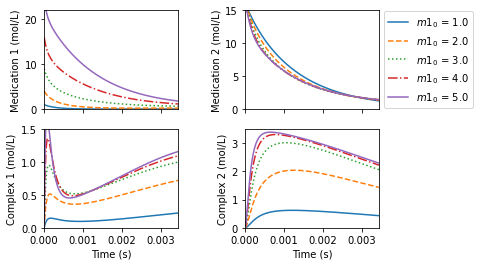

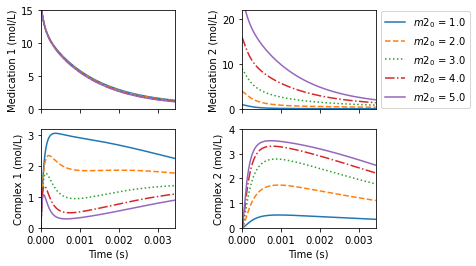

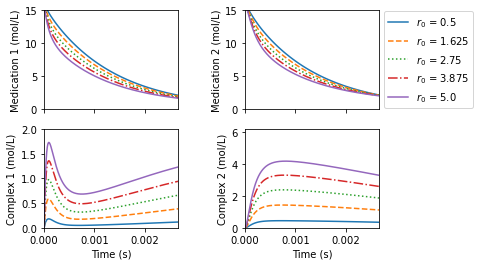

In [10]:
for i in range(5):
    # varieer m1_0
    sim_plot_full(t0, 10, n, m1_0[i], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  22, 15, 1.5, 3.5, 1, "", styles[i]) 
    plt.legend(m1labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/m1_0.png', bbox_inches='tight')
    
    # varieer m2_0
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[i], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  15, 22, 3.2, 4, 2, "", styles[i])
    plt.legend(m2labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/m2_0.png', bbox_inches='tight')
    
    # varieer r0
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[i],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  15, 15, 2, 6.2, 3, "", styles[i]) 
    plt.legend(rlabels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/r0.png', bbox_inches='tight')

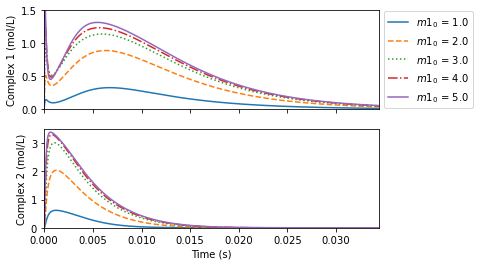

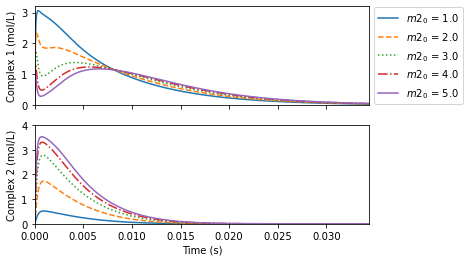

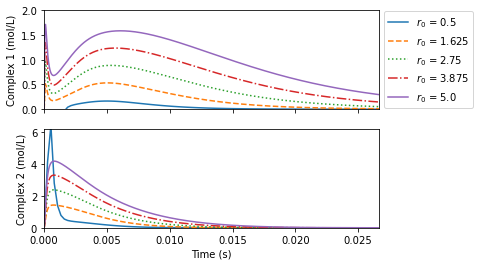

In [11]:
for i in range(5):
    # varieer m1_0
    sim_plot_compl(t0, tn, n, m1_0[i], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  1.5, 3.5, 1, "", styles[i]) 
    plt.legend(m1labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/m1_0.png', bbox_inches='tight')
    
    # varieer m2_0
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[i], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  3.2, 4, 2, "", styles[i]) 
    plt.legend(m2labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/m2_0.png', bbox_inches='tight')
    
    # varieer r0
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[i],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  2, 6.2, 3, "", styles[i]) 
    plt.legend(rlabels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/r0.png', bbox_inches='tight')

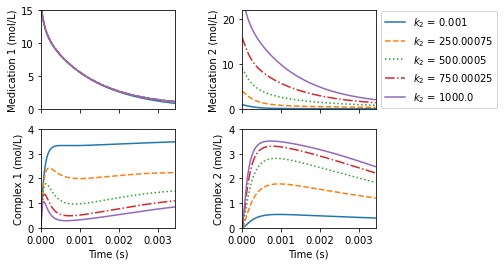

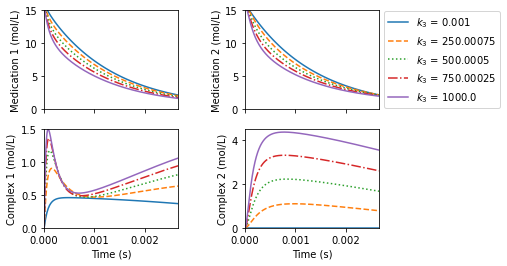

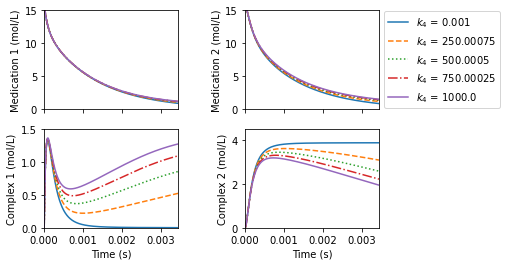

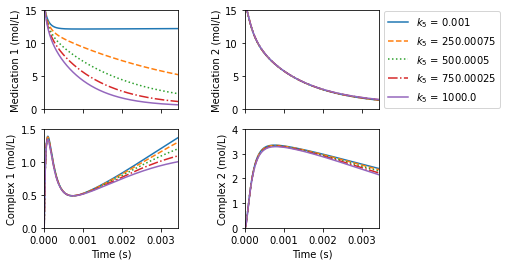

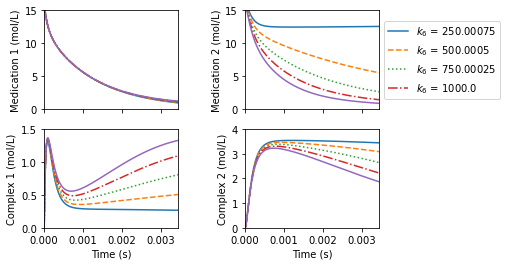

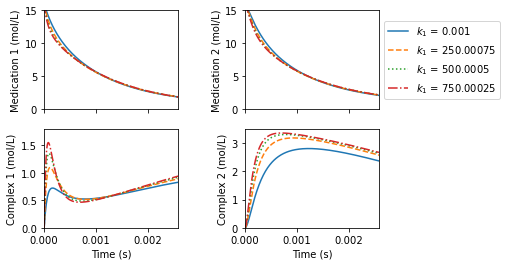

In [12]:
for i in range(5):
    # varieer k2
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[i], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[i], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  15, 22, 4, 4, 5, "", styles[i]) 
    plt.legend(k2labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/k2.png', bbox_inches='tight')
    
    # varieer k3
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[i],
                  kleinek1[3], kleinek2[3], kleinek3[i], kleinek4[3], kleinek5[3], kleinek6[3],
                  15, 15, 1.5, 4.5, 6, "", styles[i]) 
    plt.legend(k3labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/k3.png', bbox_inches='tight')
    
    # varieer k4
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[i], kleinek5[3], kleinek6[3],
                  15, 15, 1.5, 4.5, 7, "", styles[i]) 
    plt.legend(k4labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/k4.png', bbox_inches='tight')
    
    # varieer k5
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[i], kleinek6[3],
                  15, 15, 1.5, 4, 8, "", styles[i]) 
    plt.legend(k5labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/k5.png', bbox_inches='tight')
    
    # varieer k6
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[i],
                  15, 15, 1.5, 4, 9, "", styles[i]) 
    plt.legend(k6labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/k6.png', bbox_inches='tight')
    
for i in range(4):
    # varieer k1
    sim_plot_full(t0, 10, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[i+1], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  15, 15, 1.8, 3.5, 10, "", styles[i]) 
    plt.legend(k1labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/Volledig/k1.png', bbox_inches='tight')

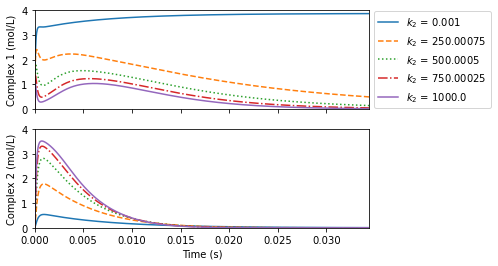

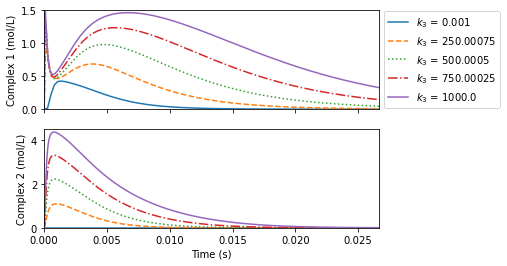

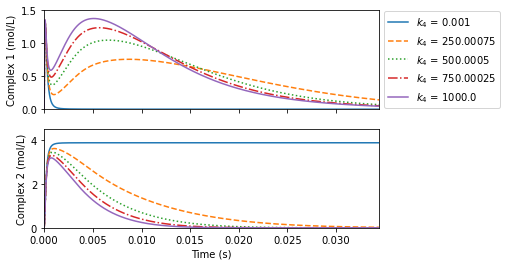

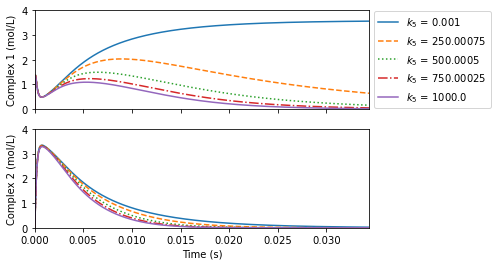

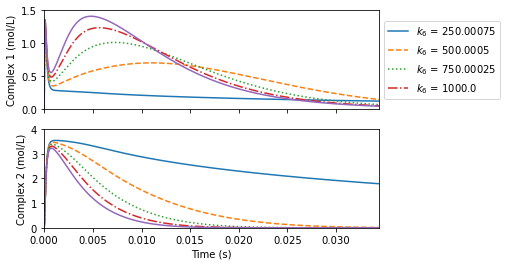

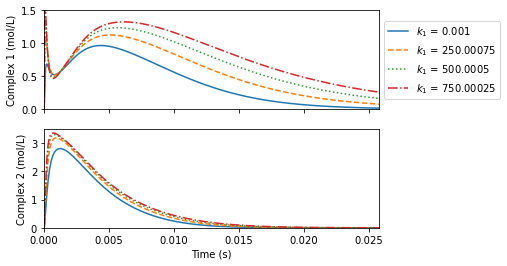

In [13]:
for i in range(5):
    # varieer k2
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[i], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[i], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  4, 4, 5, "", styles[i]) 
    plt.legend(k2labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k2.png', bbox_inches='tight')
    
    # varieer k3
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[i],
                  kleinek1[3], kleinek2[3], kleinek3[i], kleinek4[3], kleinek5[3], kleinek6[3],
                  1.5, 4.5, 6, "", styles[i]) 
    plt.legend(k3labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k3.png', bbox_inches='tight')
    
    # varieer k4
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[i], kleinek5[3], kleinek6[3],
                  1.5, 4.5, 7, "", styles[i]) 
    plt.legend(k4labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k4.png', bbox_inches='tight')
    
    # varieer k5
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[i], kleinek6[3],
                  4, 4, 8, "", styles[i])
    plt.legend(k5labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k5.png', bbox_inches='tight')
    
    # varieer k6
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[i],
                  1.5, 4, 9, "", styles[i]) 
    plt.legend(k6labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k6.png', bbox_inches='tight')
    
for i in range(4):
    # varieer k1
    sim_plot_compl(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                  kleinek1[i+1], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  1.5, 3.5, 4, "", styles[i]) 
    plt.legend(k1labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k1.png', bbox_inches='tight')

### Zooming in

In [14]:
# function that creates only the graphs for the complexes, zoomed in
def sim_plot_compl_zoom(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
                   kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6,
                   c1yaxis, c2yaxis, xaxismin, xaxismax,
                   counter, title, style):
    
    time, med1, com1, med2, com2 = RK4_M(t0, tn, n, m1_0, m2_0, c1_0, c2_0, r0,
                                         kleinek1, kleinek2, kleinek3, kleinek4, kleinek5, kleinek6)
    
    plt.figure(counter)
    
    plt.subplot(2, 1, 1)
    plt.plot(time, com1, linestyle = style) # plotting complex
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Complex 1 (mol/L)')
    plt.xticks(color='w')
    plt.xlim(xaxismin, xaxismax)
    plt.ylim(0, c1yaxis)
    
    plt.subplot(2, 1, 2)
    plt.plot(time, com2, linestyle = style) # plotting complex
    plt.xlabel('Time (s)')
    plt.ylabel('Complex 2 (mol/L)')
    plt.xlim(xaxismin, xaxismax)
    plt.ylim(0, c2yaxis)

m2_0

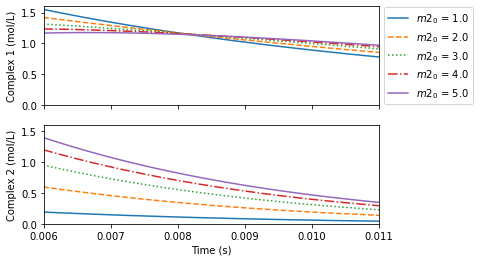

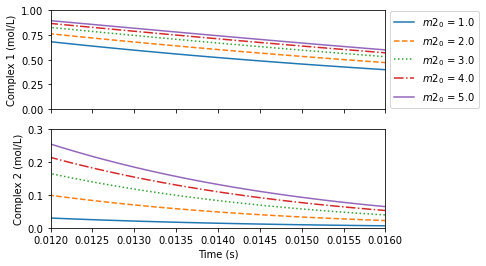

In [15]:
# zooming in on m2_0
for i in range(5):
    sim_plot_compl_zoom(t0, tn, n, m1_0[3], m2_0[i], c1_0, c2_0, r0[3],
                   kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  1.6, 1.6, 0.006, 0.011, 101, "", styles[i]) 
    plt.legend(m2labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/m2_0_zoomed1.png', bbox_inches='tight')
    
    sim_plot_compl_zoom(0, tn, n, m1_0[3], m2_0[i], c1_0, c2_0, r0[3],
                   kleinek1[3], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                  1, 0.3, 0.012, 0.016, 102, "", styles[i]) 
    plt.legend(m2labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/m2_0_zoomed2.png', bbox_inches='tight')

k1

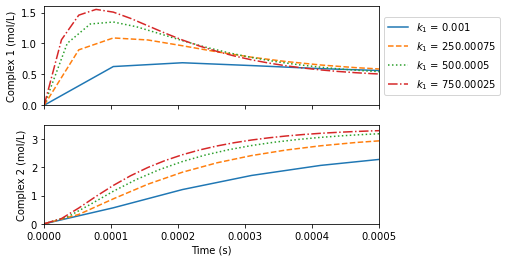

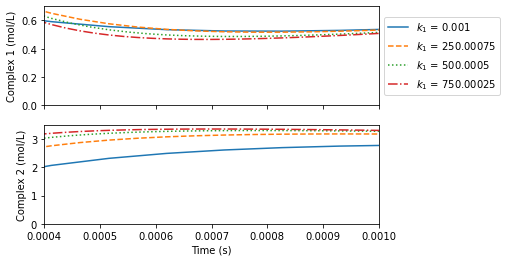

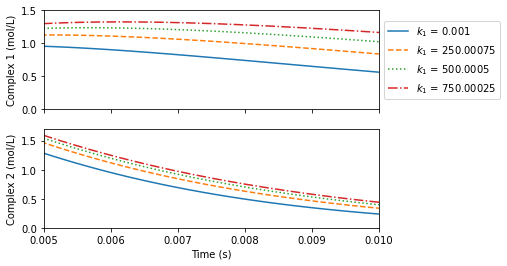

In [16]:
# zooming in on k1
for i in range(4):    
    sim_plot_compl_zoom(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                        kleinek1[i+1], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                        1.6, 3.5, 0, 0.0005, 101, "", styles[i]) 
    plt.legend(k1labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k1_zoomed1.png', bbox_inches='tight')
    
    sim_plot_compl_zoom(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                        kleinek1[i+1], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                        0.7, 3.5, 0.0004, 0.001, 102, "", styles[i]) 
    plt.legend(k1labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k1_zoomed2.png', bbox_inches='tight')
    
    sim_plot_compl_zoom(t0, tn, n, m1_0[3], m2_0[3], c1_0, c2_0, r0[3],
                        kleinek1[i+1], kleinek2[3], kleinek3[3], kleinek4[3], kleinek5[3], kleinek6[3],
                        1.5, 1.7, 0.005, 0.01, 103, "", styles[i]) 
    plt.legend(k1labels, loc = 'center left', bbox_to_anchor=(1, 1.7))
    plt.savefig('Figures/Uitbreiding2/AlleenComplex/k1_zoomed3.png', bbox_inches='tight')